# Chapter 3: Linear Regression
- **Chapter 3 from the book [An Introduction to Statistical Learning](https://www.statlearning.com/).**
- **By Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani.**
- **Pages from $121$ to $126$**
- **By [Mosta Ashour](https://www.linkedin.com/in/mosta-ashour/)**


**Exercises:**
- **[8.](#8) [(a)](#8a) [(b)](#8b) [(c)](#8c)**
- **[9.](#9) [(a)](#9a) [(b)](#9b) [(c)](#9c) [(d)](#9d) [(e)](#9e) [(f)](#9f)**
- **[10.](#10) [(a)](#10a) [(b)](#10b) [(c)](#10c) [(d)](#10d) [(e)](#10e) [(f)](#10f) [(g)](#10g) [(h)](#10h)**
- **[11.](#11) [(a)](#11a) [(b)](#11b) [(c)](#11c) [(d)](#11d) [(e)](#11e) [(f)](#11f)**
- **[12.](#12) [(a)](#12a) [(b)](#12b) [(c)](#12c)**
- **[13.](#13) [(a)](#13a) [(b)](#13b) [(c)](#13c) [(d)](#13d) [(e)](#13e) [(f)](#13f) [(g)](#13g) [(h)](#13h) [(i)](#13i) [(j)](#13j)**
- **[14.](#14) [(a)](#14a) [(b)](#14b) [(c)](#14c) [(d)](#14d) [(e)](#14e) [(f)](#14f) [(g)](#14g)**
- **[15.](#15) [(a)](#15a) [(b)](#15b) [(c)](#15c) [(d)](#15d)**


# <span style="font-family:cursive;color:#0071bb;"> 3.7 Exercises </span>
## <span style="font-family:cursive;color:#0071bb;"> Applied </span>

<a id='8'></a>
### $8.$ This question involves the use of simple linear regression on the <span style="font-family:cursive;color:red;"> $Auto$ </span> data set.

<a id='8a'></a>
**($a$) Use the <span style="font-family:cursive;color:red;"> $lm()$ </span> function to perform a simple linear regression with <span style="font-family:cursive;color:red;"> $mpg$ </span> as the response and <span style="font-family:cursive;color:red;"> $horsepower$ </span> as the predictor. Use the <span style="font-family:cursive;color:red;"> $summary()$ </span> function to print the results. Comment on the output. For example:**

In [1]:
# import all necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import datasets
import patsy

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
%matplotlib inline

In [2]:
# Read the Auto dataset
auto_df = pd.read_csv('datasets/auto.csv')

# Remove missing values
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
auto_df = auto_df.reset_index(drop=True)
auto_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [3]:
# Convert horsepower to numerics
auto_df['horsepower'] = auto_df['horsepower'].astype(np.float64)

# Model
X = sm.add_constant(auto_df['horsepower'])
y = auto_df['mpg']
lm = sm.OLS(y, X).fit()

# Using the summary() func
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.03e-81
Time:                        21:16:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **$i.$** Is there a relationship between the predictor and the response?

> - With the $p-value$ associated for $horsepower$ indicates a strong evidence of a relationship between $mpg$ and $horsepower$.

- **$ii.$** How strong is the relationship between the predictor and the response?

In [4]:
# Calculating the correlation using Pearson method
print("The correlation between mpg and horsepower is:", auto_df[['mpg', 'horsepower']].corr().iloc[0,1])

The correlation between mpg and horsepower is: -0.7784267838977751


> - With $R^2$ equal $0.606$ means that approximately $60.6$% of the observed variation can be explained using $horsepower$.
> - The correlation between $mpg$ and $horsepower$ using the $pearson$ method is $-0.7784$, indicate a strong negative relationship.
> - For a unit increase in $horsepower$, the model predict $mpg$  will decrease by $-0.1578$.

- **$iii.$** Is the relationship between the predictor and the response positive or negative?

> - Strong negative.

- **$iv.$** What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [5]:
# predect mpg
horsepower = 98
alpha = .05 # 95% ci
pred = lm.get_prediction([1, horsepower]).summary_frame(alpha=.05)

print("The predicted mpg is:", round(pred['mean'][0], 5))
print("The associated 95 % confidence and prediction intervals are:")
print("Lower:", round(pred['mean_ci_lower'][0], 5))
print("Upper:", round(pred['mean_ci_upper'][0], 5))

The predicted mpg is: 24.46708
The associated 95 % confidence and prediction intervals are:
Lower: 23.97308
Upper: 24.96108


<a id='8b'></a>
**$(b)$ Plot the response and the predictor. Use the $abline()$ function
to display the least squares regression line.**

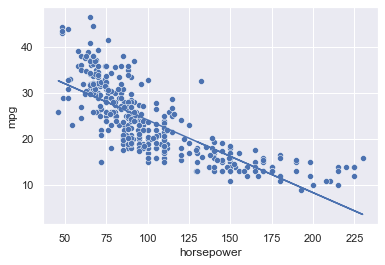

In [6]:
# scatter plot with least squares regression line

ax = sns.scatterplot(x='horsepower', y='mpg', data=auto_df, )
ax.plot(X.horsepower, lm.predict(X));

<a id='8c'></a>
**$(c)$ Use the $plot()$ function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

In [7]:
def diagnostic_plots(lm, X, y):
    '''
    Provides R style diagnostic plots based on results from lm_stat()
    Emulate the function lm().plot() in R
    lm => a fitted lm_state() model
    X  => sm.add_constant(  "the predictor variable"  )
    y  => the response variable
    '''
    
    # model values
    model_fitted_y = lm.fittedvalues
    # model residuals
    model_residuals = lm.resid
    # normalized residuals
    model_norm_residuals = lm.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = lm.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = lm.get_influence().cooks_distance[0]
    dataframe = pd.concat([X, y], axis=1)
    
    
    plt.figure(1, figsize=(16, 18))
    
    ### Residuals vs Fitted  
    plt.subplot(321)
    sns.residplot(x=model_fitted_y, y=dataframe.columns[-1], data=dataframe,
                  lowess=True,
                  scatter_kws={'alpha': 0.5},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    lim = (max(model_fitted_y) - min(model_fitted_y))*.02
    plt.xlim([min(model_fitted_y)-lim, max(model_fitted_y)+lim])
    
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plt.annotate(i, xy=(model_fitted_y[i],
                            model_residuals[i]));
    
    
    
    ### Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(model_norm_residuals, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plt.annotate(i, xy=(np.flip(ax[0][0])[r],
                            model_norm_residuals[i]));
    
    
    ### Standardised residuals
    plt.subplot(323)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

    plt.title('Scale-Location')
    plt.xlabel('Fitted values')
    plt.ylabel('$\sqrt{|Standardized Residuals|}$');
    plt.xlim([min(model_fitted_y)-lim, max(model_fitted_y)+lim])

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plt.annotate(i,
                     xy=(model_fitted_y[i],
                         model_norm_residuals_abs_sqrt[i]));
    
    
    ### Residuals vs Fitted
    plt.subplot(324)
    sns.regplot(x=model_leverage, y=model_norm_residuals,
                ci=0.05,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

    lim = (max(model_leverage) - min(model_leverage))*.02
    plt.xlim(min(model_leverage)-0.001, max(model_leverage)+0.001)
    plt.ylim(min(model_norm_residuals)-0.1, max(model_norm_residuals)+0.1)
    plt.title('Residuals vs Leverage')
    plt.xlabel('Leverage')
    plt.ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plt.annotate(i, xy=(model_leverage[i],
                            model_norm_residuals[i]));

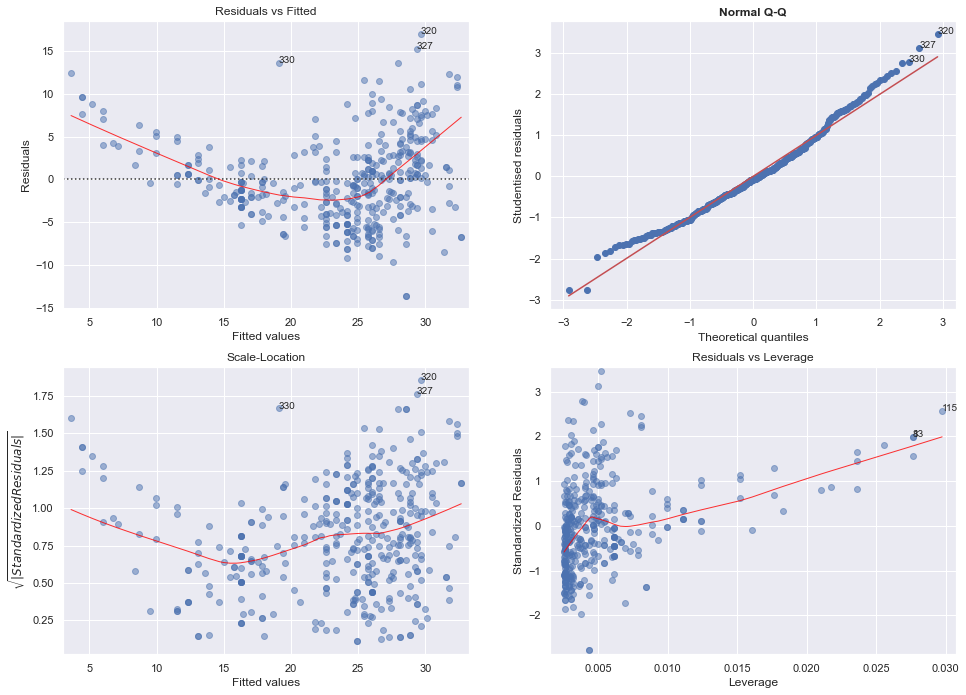

In [8]:
# produce diagnostic plots of the least squares regression fit
diagnostic_plots(lm, X, y)

### The above grid shows diagnostic plots of the least squares regression fit:
**We can go through the potential problems one by one:**

- **1- Non-linearity of the data:**
 - The top-left residual plot exhibits a clear U-shape, which provides a strong indication of non-linearity in the data
 
 
- **2- Non-constant variance of error terms:**
 - From the top-left residual plot we can identify a heteroscedasticity from the presence of a funnel shape.
 - The bottom-left standardised plot shows that using a concave function such as $\sqrt{Y}$ didn't help.
 - In this case a simple remedy is to fit our model by $\text{weighted least squares}$
 
 
- **3- Outliers:** 
 - the outliers is clearly visible in the residual plot illustrated by annotations.
 - In the top-right normal Q-Q plot we can say observations whose studentized residuals are greater than 3 in absolute value are possible outliers.
 - Also the bottom-right residual vs leverage plot suggests that there are several potential outliers 


- **4- leverage:**
 - The bottom-right residual vs leverage plot has many points falls outside the bulk of the data, and hence has high leverage.

<a id='9'></a>
## $9.$ This question involves the use of multiple linear regression on the Auto data set.

<a id='9a'></a>
**$(a)$ Produce a scatterplot matrix which includes all of the variables in the data set.**

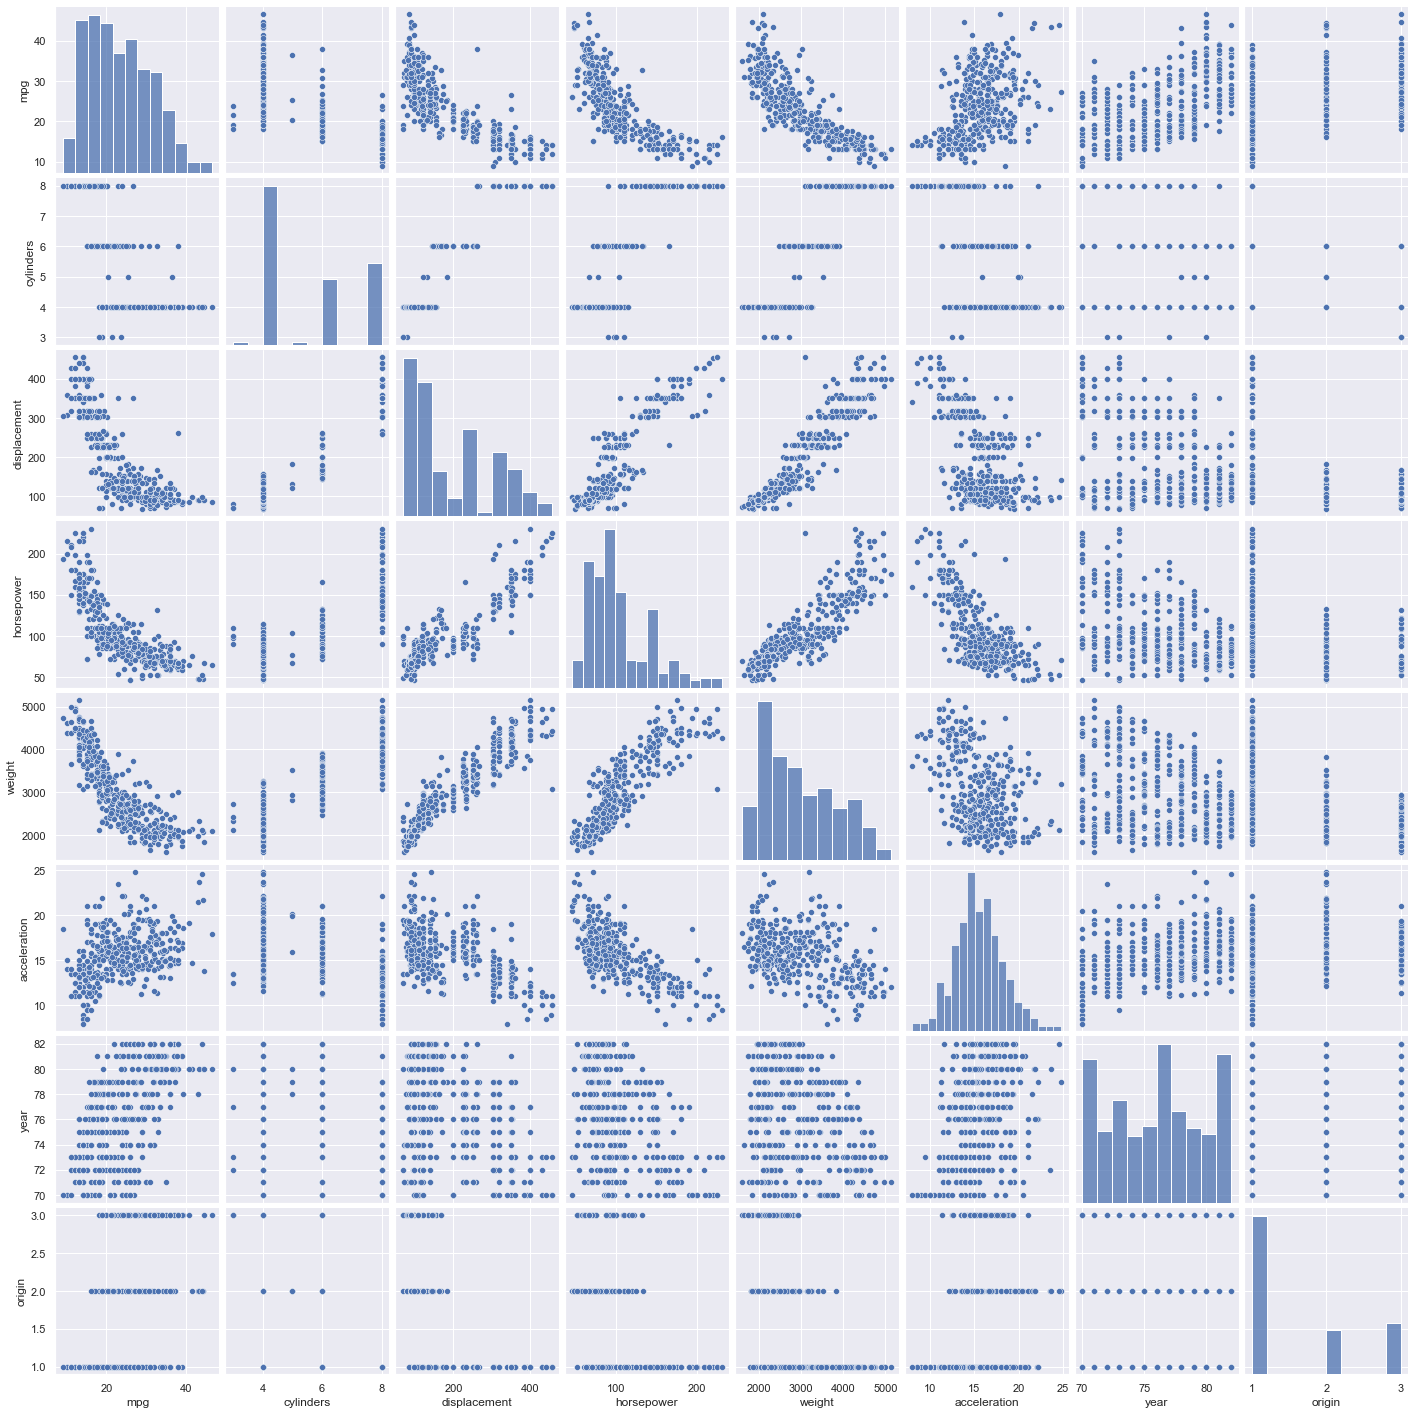

In [9]:
sns.pairplot(auto_df);

<a id='9b'></a>
**$(b)$ Compute the matrix of correlations between the variables using the function $cor()$. You will need to exclude the name variable, which is qualitative**

In [10]:
auto_df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

<AxesSubplot:>

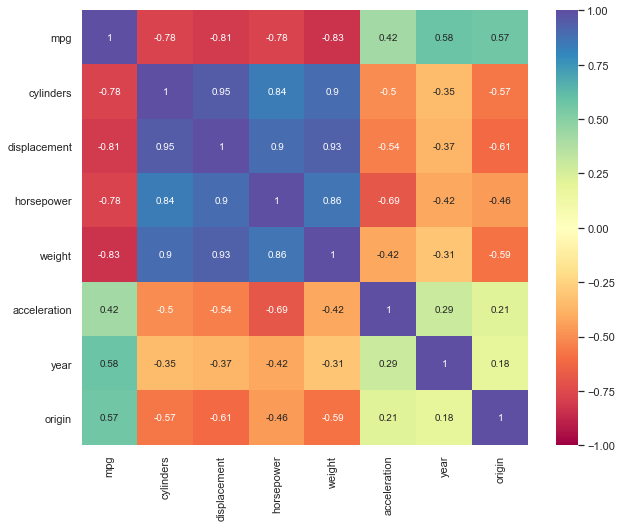

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(auto_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')

<a id='9c'></a>
**$(c)$ Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the $summary()$ function to print the results. Comment on the output. For instance:**

In [12]:
auto_df.columns[~auto_df.columns.isin(['mpg', 'name'])].values

array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

In [13]:
# This function (patsy.dmatieces()) is identical to dmatrix(),
# except that it requires (and returns) two matrices instead of one.
# By convention, the first matrix is the response or Y data,
# and the second is the predictor or X data.
# https://patsy.readthedocs.io/en/latest/API-reference.html

f = 'mpg ~ cylinders \
         + displacement \
         + horsepower \
         + weight \
         + acceleration \
         + year \
         + C(origin)'

y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')
# Model
lm = sm.OLS(y, X).fit()

# Using the summary() func
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.79e-139
Time:                        21:16:27   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- $i.$ Is there a relationship between the predictors and the response?

- $ii.$ Which predictors appear to have a statistically significant relationship to the response?

>- The null hypothesis in this case is that there's no relationship:
$$H_0: \beta_i = 0$$
>- The following predictors below have $p-values$ < 0.05 indicates a significant evidence of a relationship to $mpg$.
>- We **can reject** the null hypothesis.

In [14]:
lm.pvalues[lm.pvalues < 0.05].sort_values()

year              2.332943e-40
weight            6.375633e-22
C(origin)[T.3]    3.933208e-07
C(origin)[T.2]    4.720373e-06
Intercept         1.445124e-04
displacement      1.862685e-03
dtype: float64

>- The following predictors below have $p-values$ > 0.05
>- We **can not reject** the null hypothesis.

In [15]:
lm.pvalues[lm.pvalues > 0.05].sort_values()

cylinders       0.128215
horsepower      0.185488
acceleration    0.421101
dtype: float64

- $iii.$ What does the coefficient for the year variable suggest?

>- The coefficient for the $year$ variable suggests that there's a positive relationship between $year$ and $mpg$.
>- The average effect of an increase is 0.777 $mpg/year$

<a id='9d'></a>
**$(d)$ Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

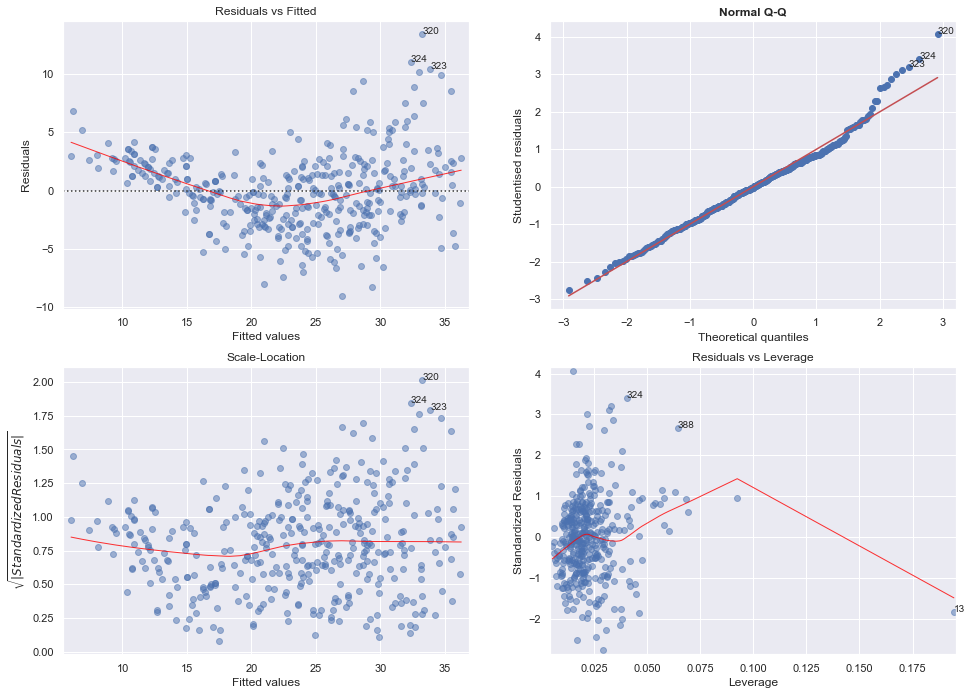

In [16]:
# produce diagnostic plots of the least squares regression fit
diagnostic_plots(lm, X, y)

- **1- Non-linearity of the data:**
 - The top-left residual plot exhibits U-shape, which provides a strong indication of a `non-linearity` in the data
 - The bottom left Scale-Location plot suggests that a square-root transform reduces the non-linearity of this relationship
 
- **2- Non-constant variance of error terms:**
 - From the top-left residual plot we can identify a heteroscedasticity from the presence of a funnel shape.
 - The bottom-left standardised plot shows that using a concave function such as $\sqrt{Y}$ didn't help.
 - In this case a simple remedy is to fit our model by $\text{weighted least squares}$
 
 
- **3- Outliers:** 
 - the outliers is clearly visible in the residual plot illustrated by annotations.
 - In the top-right normal Q-Q plot we can say observations whose studentized residuals are greater than 3 in absolute value are possible outliers.
 - Also the bottom-right residual vs leverage plot suggests that there are several potential outliers 


- **4- leverage:**
 - The bottom-right residual vs leverage plot has a clear one point falls outside the bulk of the data, and hence has high leverage.
 - This point is not an outlier.

<a id='9e'></a>
**$(e)$ Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In [17]:
# the base formula
f = 'mpg ~ cylinders \
         + displacement \
         + horsepower \
         + weight \
         + acceleration \
         + year \
         + C(origin)'

# columns to interaction between
ia = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
l = []

# all possible interaction
for i in ia:
    for j in ia:
        if (i != j) and (j not in l):
            f += (f" + {i}*{j}")
    l.append(i)


y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()

# Using the summary() func
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.66e-156
Time:                        21:16:29   Log-Likelihood:                -939.16
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     368   BIC:                             2022.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -19.4156     49.770     -0.390      0.697    -117.285      78.454
C(origin)[T.2]                1.4394      0.543      2.652      0.008       0.372       2.507
C(origin)[T.3]                1.2321      0.514      2.397      0.017       0.221       2.243
cylinders                     6.7083      8.230      0.815      0.416      -9.475      22.891
displacement                 -0.3032      0.180     -1.680      0.094      -0.658       0.052
horsepower                    0.3628      0.326      1.112      0.267      -0.279       1.005
weight                        0.0068      0.017      0.392      0.696      -0.028       0.041
acceleration                 -4.6534      2.114     -2.201      0.028      -8.811      -0.496
year                          1.1361      0.584      1.946      0.052      -0.012       2.284
cylinders:displacement       -0.0129      0.005     -2.719      0.007      -0.022      -0.004
cylinders:horsepower          0.0316      0.024      1.338      0.182      -0.015       0.078
cylinders:weight              0.0004      0.001      0.519      0.604      -0.001       0.002
cylinders:acceleration        0.2870      0.167      1.720      0.086      -0.041       0.615
cylinders:year               -0.1699      0.095     -1.793      0.074      -0.356       0.016
displacement:horsepower      -0.0002      0.000     -0.543      0.588      -0.001       0.000
displacement:weight         3.01e-05   1.38e-05      2.186      0.029    3.02e-06    5.72e-05
displacement:acceleration    -0.0063      0.003     -1.970      0.050      -0.013   -1.14e-05
displacement:year             0.0052      0.002      2.345      0.020       0.001       0.010
horsepower:weight         -3.715e-05   2.84e-05     -1.310      0.191   -9.29e-05    1.86e-05
horsepower:acceleration      -0.0040      0.004     -1.112      0.267      -0.011       0.003
horsepower:year              -0.0052      0.004     -1.338      0.182      -0.013       0.002
weight:acceleration           0.0002      0.000      0.731      0.465      -0.000       0.001
weight:year                  -0.0003      0.000     -1.191      0.234      -0.001       0.000
acceleration:year             0.0531      0.025      2.098      0.037       0.003       0.103
==============================================================================
Omnibus:                       35.883   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.345
Skew:                           0.466   Prob(JB):                     4.84e-19
Kurtosis:                       5.073   Cond. No.                     3.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

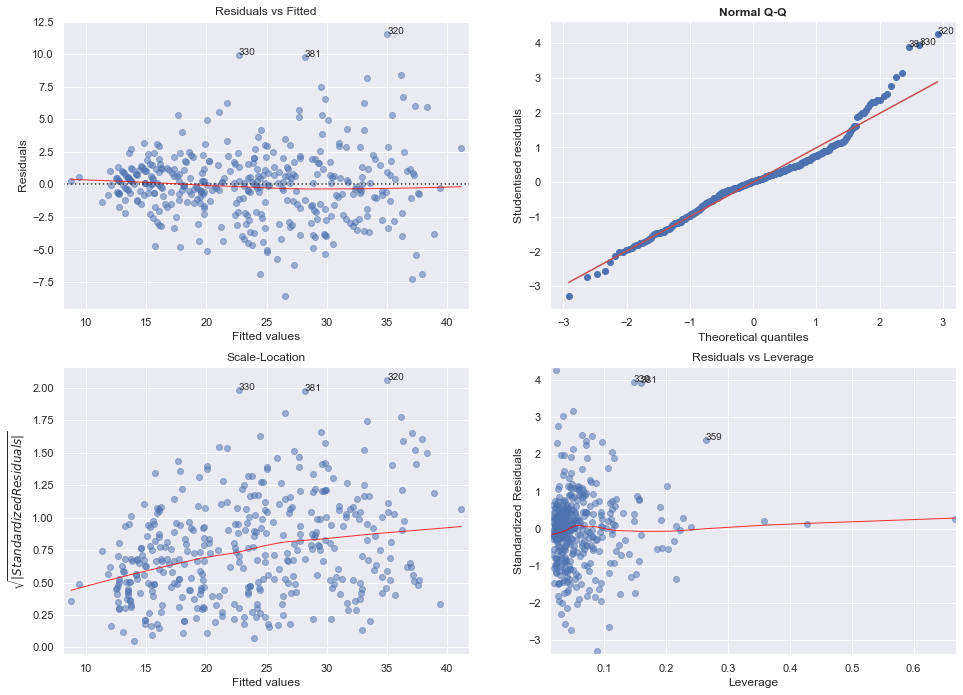

In [18]:
diagnostic_plots(lm, X, y)

>- These interactions below are the only statistically significant with $p-values$ < 0.05

In [19]:
pv = lm.pvalues[lm.pvalues < 0.05]
pv.filter(like = ':', axis=0).sort_values()

cylinders:displacement       0.006867
displacement:year            0.019580
displacement:weight          0.029446
acceleration:year            0.036595
displacement:acceleration    0.049588
dtype: float64

>- Notice the warning [2] that suggests this might indicate that there are
strong multicollinearity or other numerical problems in the model.
>- We could observe in the correlation plot above that there is strong collinearity between $mpg$, $cylinders$, $displacement$, $horsepower$, and $weight$. 
>- This means further investigation is required to discern which, if any, of these features have a causal relationship with our response $mpg$.

<a id='9f'></a>
**$(f)$ Try a few different transformations of the variables, such as
$\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.**

### Let's start with $log(X)$

In [20]:
# the base formula
f = 'mpg ~ np.log1p(cylinders) \
         + np.log1p(displacement) \
         + np.log1p(horsepower) \
         + np.log1p(weight) \
         + np.log1p(acceleration) \
         + np.log1p(year) \
         + C(origin)'

# columns to interaction between
ia = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
l = []

# all possible interaction
for i in ia:
    for j in ia:
        if (i != j) and (j not in l):
            f += (f" + np.log1p({i}*{j})")
    l.append(i)

y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()

# Using the summary() func
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.17e-165
Time:                        21:16:32   Log-Likelihood:                -916.55
No. Observations:                 392   AIC:                             1881.
Df Residuals:                     368   BIC:                             1976.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -3901.6636    807.530     -4.832      0.000   -5489.616   -2313.711
C(origin)[T.2]                            0.6904      0.532      1.298      0.195      -0.356       1.737
C(origin)[T.3]                            1.0698      0.493      2.171      0.031       0.101       2.039
np.log1p(cylinders)                     349.0045    230.093      1.517      0.130    -103.458     801.467
np.log1p(displacement)                   68.0398   3025.145      0.022      0.982   -5880.700    6016.779
np.log1p(horsepower)                   5223.2895   2276.311      2.295      0.022     747.081    9699.498
np.log1p(weight)                      -6033.9358   2.36e+04     -0.256      0.798   -5.24e+04    4.03e+04
np.log1p(acceleration)                 -120.8610    489.277     -0.247      0.805   -1082.992     841.270
np.log1p(year)                         5.976e+04   1.17e+04      5.129      0.000    3.69e+04    8.27e+04
np.log1p(cylinders * displacement)    -2.122e+04   5197.340     -4.083      0.000   -3.14e+04    -1.1e+04
np.log1p(cylinders * horsepower)       9471.1045   4713.332      2.009      0.045     202.662    1.87e+04
np.log1p(cylinders * weight)           2.974e+04   9844.975      3.020      0.003    1.04e+04    4.91e+04
np.log1p(cylinders * acceleration)     2113.1341    839.678      2.517      0.012     461.965    3764.303
np.log1p(cylinders * year)            -2.042e+04   7482.494     -2.729      0.007   -3.51e+04   -5708.241
np.log1p(displacement * horsepower)    2447.5279   5.98e+04      0.041      0.967   -1.15e+05     1.2e+05
np.log1p(displacement * weight)         -5.5e+05   1.54e+05     -3.573      0.000   -8.53e+05   -2.47e+05
np.log1p(displacement * acceleration)  3040.2027   1.69e+04      0.180      0.858   -3.02e+04    3.63e+04
np.log1p(displacement * year)          5.657e+05   1.54e+05      3.663      0.000    2.62e+05    8.69e+05
np.log1p(horsepower * weight)          5.552e+05   1.38e+05      4.024      0.000    2.84e+05    8.27e+05
np.log1p(horsepower * acceleration)   -4.222e+04   1.37e+04     -3.087      0.002   -6.91e+04   -1.53e+04
np.log1p(horsepower * year)           -5.302e+05   1.36e+05     -3.890      0.000   -7.98e+05   -2.62e+05
np.log1p(weight * acceleration)        4.115e+04   2.84e+04      1.450      0.148   -1.46e+04     9.7e+04
np.log1p(weight * year)                -7.01e+04   6.31e+04     -1.112      0.267   -1.94e+05    5.39e+04
np.log1p(acceleration * year)         -3982.8240   2.58e+04     -0.154      0.877   -5.47e+04    4.68e+04
==============================================================================
Omnibus:                       46.973   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      

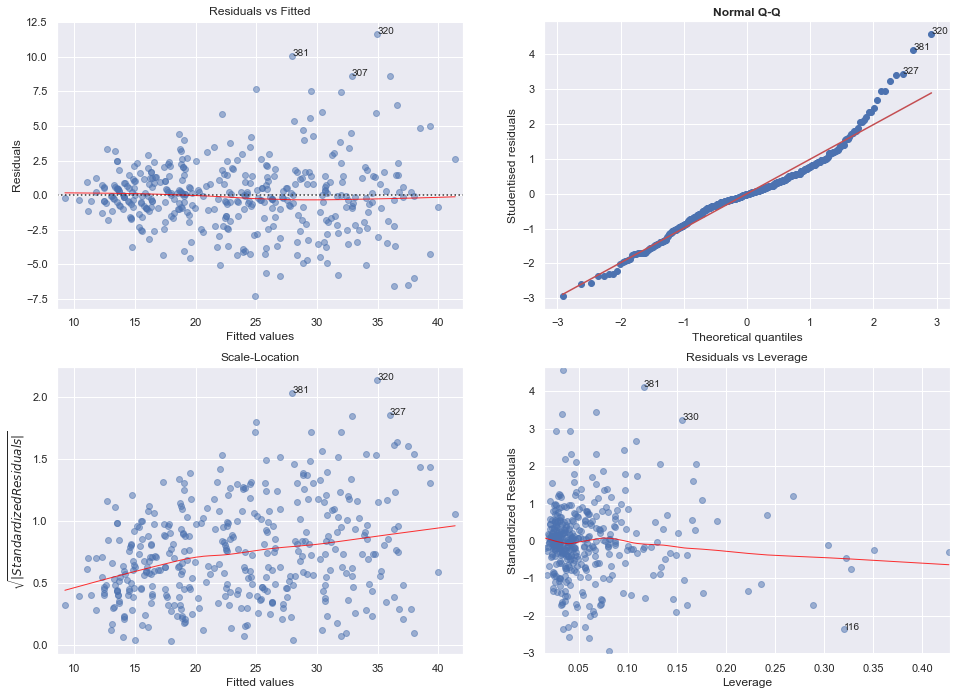

In [21]:
diagnostic_plots(lm, X, y)

>- These interactions below are statistically significant with $p-values$ < 0.05

In [22]:
print("R sqaured =", lm.rsquared)

pv = lm.pvalues[lm.pvalues < 0.05]
pv.filter(like = '*', axis=0).sort_values()

R sqaured = 0.8965409366016808


np.log1p(cylinders * displacement)     0.000055
np.log1p(horsepower * weight)          0.000070
np.log1p(horsepower * year)            0.000119
np.log1p(displacement * year)          0.000286
np.log1p(displacement * weight)        0.000400
np.log1p(horsepower * acceleration)    0.002173
np.log1p(cylinders * weight)           0.002700
np.log1p(cylinders * year)             0.006651
np.log1p(cylinders * acceleration)     0.012274
np.log1p(cylinders * horsepower)       0.045221
dtype: float64

>- Comparing the above diagnostic grid with the grid $(e)$ suggests that taking log of predictors has further reduced the non-linearities in our dataset with 10 features appear as significant.

### Secondly with $\sqrt{X}$

In [23]:
# the base formula
f = 'mpg ~ np.sqrt(cylinders) \
         + np.sqrt(displacement) \
         + np.sqrt(horsepower) \
         + np.sqrt(weight) \
         + np.sqrt(acceleration) \
         + np.sqrt(year) \
         + C(origin)'

# columns to interaction between
ia = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
l = []

# all possible interaction
for i in ia:
    for j in ia:
        if (i != j) and (j not in l):
            f += (f" + np.sqrt({i}*{j})")
    l.append(i)

y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()

# Using the summary() func
#lm.summary() ###remove the first "#" to check the model summary.

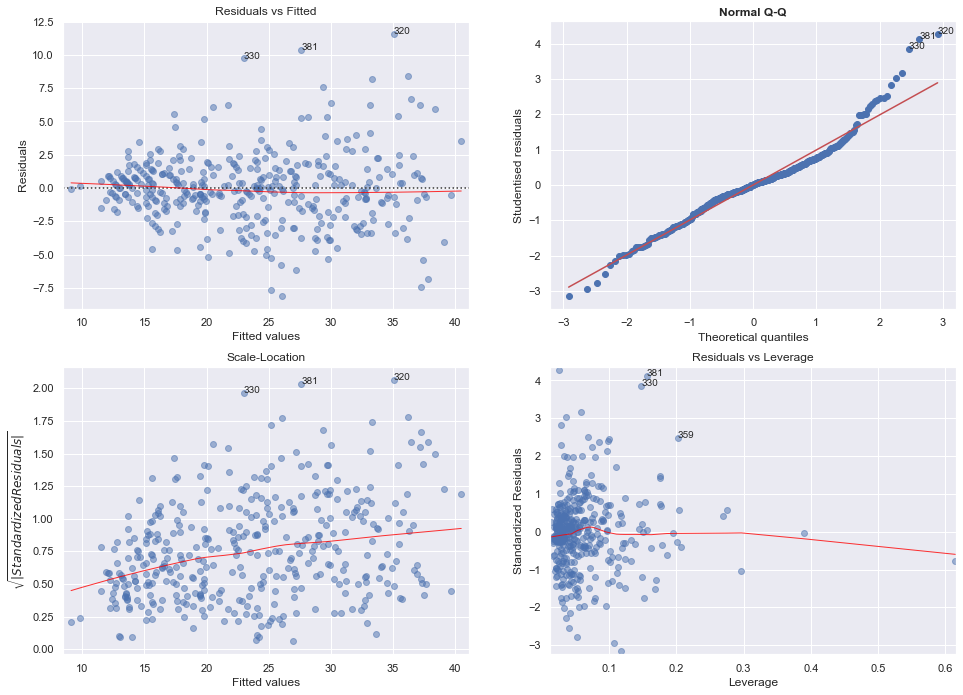

In [24]:
diagnostic_plots(lm, X, y)

>- These interactions below are statistically significant with $p-values$ < 0.05

In [25]:
print("R sqaured =", lm.rsquared)

pv = lm.pvalues[lm.pvalues < 0.05]
pv.filter(like = '*', axis=0).sort_values()

R sqaured = 0.8840495684265853


np.sqrt(cylinders * displacement)    0.002555
np.sqrt(displacement * weight)       0.032175
dtype: float64

### Finally with $X^2$

In [26]:
# the base formula
f = 'mpg ~ np.square(cylinders) \
         + np.square(displacement) \
         + np.square(horsepower) \
         + np.square(weight) \
         + np.square(acceleration) \
         + np.square(year) \
         + C(origin)'

# columns to interaction between
ia = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
l = []

# all possible interaction
for i in ia:
    for j in ia:
        if (i != j) and (j not in l):
            f += (f" + np.square({i}*{j})")
    l.append(i)

y, X = patsy.dmatrices(f, auto_df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()

# Using the summary() func
#lm.summary() ###remove the first "#" to check the model summary.

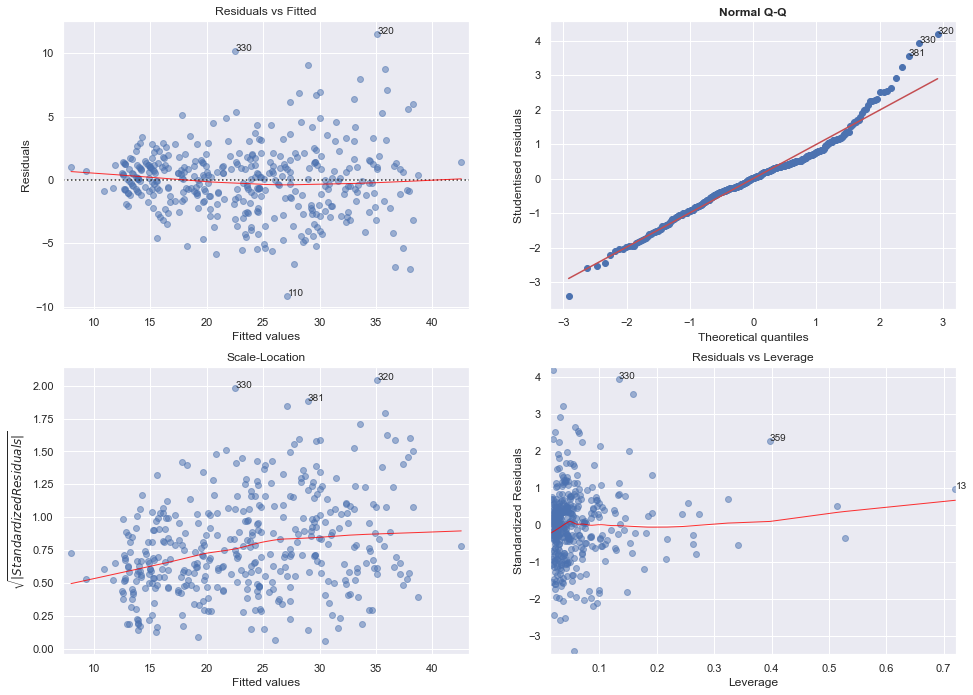

In [27]:
diagnostic_plots(lm, X, y)

>- These interactions below are statistically significant with $p-values$ < 0.05

In [28]:
print("R sqaured =", lm.rsquared)

pv = lm.pvalues[lm.pvalues < 0.05]
pv.filter(like = '*', axis=0).sort_values()

R sqaured = 0.880935847861797


np.square(cylinders * weight)          0.003250
np.square(acceleration * year)         0.005123
np.square(cylinders * displacement)    0.014765
np.square(displacement * year)         0.022872
dtype: float64

<a id='10'></a>
## 10. This question should be answered using the $Carseats$ data set.

<a id='10a'></a>
**$(a)$ Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [29]:
# Load data
carseats_df = pd.read_csv('datasets/Carseats.csv').drop('Unnamed: 0', axis=1)
carseats_df.info()
carseats_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [30]:
# fitting the model with Sales as a response and Price, Urban, and US as a predictors. 
f = 'Sales ~ Price + C(Urban) + C(US)'
y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')

# Fit model
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.39e-23
Time:                        21:16:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R sqaured = 0.23927539218405547


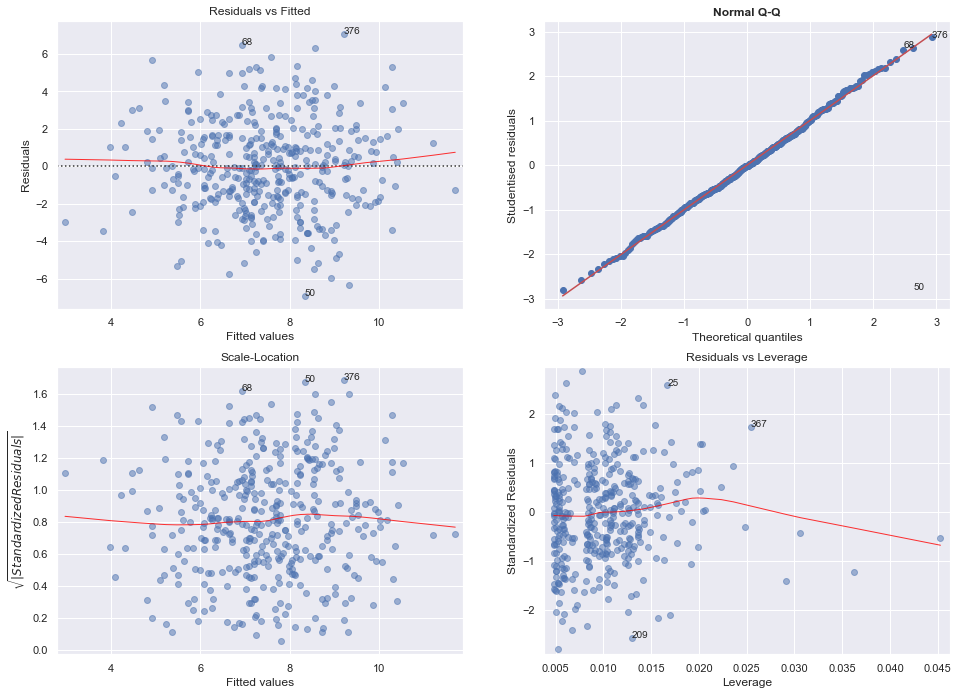

In [31]:
print("R sqaured =", lm.rsquared)
diagnostic_plots(lm, X, y);

<a id='10b'></a>
**$(b)$ Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

>- The interpretation of the $Price$ coefficient is that for each unit increase in $Price$, $Sales$ decrease by $54.5$ dollars on average, with all other predictors remaining fixed.

>- The interpretation of the $Urban$ coefficient is that if the store is in an $Urban$ location, $Sales$ decrease by $21.9$ dollars on average than in a rural location, with all other predictors are fixed.

>- The interpretation of the $US$ coefficient is that if the store is in $US$, $Sales$ increase by $1200.6$ dollars on average, with all other predictors are fixed.

>- There seems to be a statistically significant relationship between the response $Sales$ and the predictors $Price$ and $US$.

>- But there's no statistically significant relationship between $Sales$ and $Urban$.

In [32]:
lm.params

Intercept          13.043469
C(Urban)[T.Yes]    -0.021916
C(US)[T.Yes]        1.200573
Price              -0.054459
dtype: float64

<a id='10c'></a>
**$(c)$ Write out the model in equation form, being careful to handle the qualitative variables properly.**


$$Sales = 13.04347 + (-0.05446 \times Price) + (1.20057 \times US) + (-0.02192 \times Urban) + \epsilon$$

>- With $Urban=1$ if the store is in an urban location and 0 if is in rural,
>- and with $US=1$ if the store is in the US and 0 if not.

<a id='10d'></a>
**$(d)$ For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?**

In [33]:
print("We can reject the null hypothesis for:")
list(lm.pvalues[lm.pvalues < 0.05].index[1:])

We can reject the null hypothesis for:


['C(US)[T.Yes]', 'Price']

<a id='10e'></a>
**$(e)$ On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [34]:
f = 'Sales ~ Price + C(US)'
y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.66e-24
Time:                        21:16:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R sqaured = 0.23926288842678567


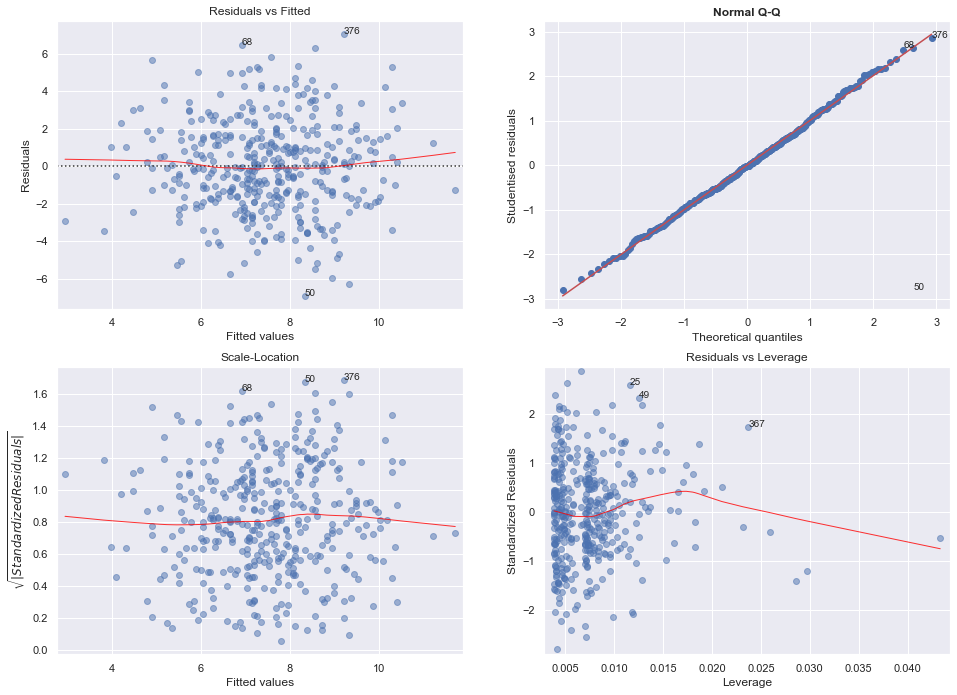

In [35]:
print("R sqaured =", lm.rsquared)
diagnostic_plots(lm, X, y);

<a id='10f'></a>
## (f) How well do the models in (a) and (e) fit the data?

In [36]:
round((0.23927539218405547 - 0.23926288842678567)*100, 5)

0.00125

>- The $R^2$ illustrate that our model in $(e)$ seems to be slightly better than the model in $(a)$. 
>- $0.00125$% of the variability is explained by the model in $(e)$ more than the model in $(a)$.

<a id='10g'></a>
## (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [37]:
lm.conf_int(alpha=0.05)

0          1
Intercept     11.79032  14.271265
C(US)[T.Yes]   0.69152   1.707766
Price         -0.06476  -0.044195

<a id='10h'></a>
**$(h)$ Is there evidence of outliers or high leverage observations in the model from $(e)$?**

>- In the top-right **Normal Q-Q** plot there's no observations exceed the residual thresholds for outliers of $+/-3$.
>- In the bottom-right plot **Residuals vs Leverage** there's one observation that stands out as particularly high leverage, but we can't consider this observation as an outlier.

<a id='11'></a>
## $11.$ In this problem we will investigate the $\text{t-statistic}$ for the null hypothesis $H_0 : \beta_j = 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and a response $y$ as follows.

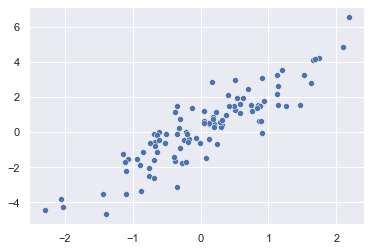

In [38]:
# the equivalence in python
np.random.seed(1)
x  = np.random.normal(size=100)
y  = 2*x + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

<a id='11a'></a>
**$(a)$ Perform a simple linear regression of $y$ onto $x$, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the $\text{t-statistic}$ and $\text{p-value}$ associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command $\text{lm(y∼x+0)}$.)**

In [39]:
# Linear regression without intercept
f = 'y ~ x + 0'
y, X = patsy.dmatrices(f, df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    3.46e-36
Time:                        21:16:43   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>- The interpretation of the coefficient is that for each unit increase in $x$, $y$ increase by $2.1067$ units on average, and that's close to the real known value of 2.
>- The standard error $0.106$ indicates that $\text{95%}$ confidence bounds do include the true value of $y$.
>- $\text{t-statistic}$ and $\text{p-value}$ are $19.792$ and $\text{3.457376e-36}$  respectively

>- Our model results shows a statistically significant relationship between $x$ and $y$, and with the small $\text{p-value}$ we can reject the null-hypothesis.

<a id='11b'></a>
**$(b)$ Now perform a simple linear regression of $x$ onto $y$, without an intercept, and report the coefficient estimate, the standard error of this coefficient estimate, and the $\text{t-statistic}$ and $\text{p-value}$ associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.**

In [40]:
# Linear regression without intercept
f = 'x ~ y + 0'
y, X = patsy.dmatrices(f, df, return_type='dataframe')

# Model
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                    3.46e-36
Time:                        21:16:43   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>- The interpretation of the coefficient is that for each unit increase in $y$, $x$ increase by $0.3789$ units on average, and that's underestimating of the known value of $0.5$.
>- The standard error $0.019$ indicates that $\text{95%}$ confidence bounds do not include the true value of $x$.
>- $\text{t-statistic}$ and $\text{p-value}$ are $19.792$ and $\text{3.457376e-36}$  respectively.

>- Our model results shows a statistically significant relationship between $y$ and $x$, and with the small $\text{p-value}$ we can reject the null-hypothesis.

<a id='11c'></a>
**$(c)$ What is the relationship between the results obtained in $(a)$ and $(b)$?**

>- We obtain the same values for $\text{t-statistic}$ and $\text{p-value}$. >- Both results in $(a)$ and $(b)$ reflect the same line created.
>- In other words, $y=2x+\epsilon$ could also be written as $x=\frac{y−\epsilon}{2}$.

**$(d)$ For the regression of $Y$ onto $X$ without an intercept, the $\text{t-statistic}$
for $H_0 : \beta = 0$ takes the form $\hat{\beta}/SE(\hat{\beta})$, where $\hat{\beta}$ is given by (3.38), and where**

$$SE(\hat{\beta}) = \sqrt{
                    \dfrac{\sum_{i=1}^{n} (y_i - x_i\hat{\beta})^2}
                         {(n-1)\sum_{i'=1}^{n}x^{2}_{i'}}
                          }$$
                         
**(These formulas are slightly different from those given in Sections
3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as**

$$
\dfrac{(\sqrt{n-1}) \sum_{i=1}^{n} x_i y_i
      }
     {\sqrt{(\sum_{i=1}^{n} x^{2}_{i})
            (\sum_{i'=1}^{n} y^{2}_{i'}) -
            (\sum_{i'=1}^{n} x_{i'}y_{i'})^{2}
            }
      }
$$

$\text{We have:}$

$$ \hat{\beta} = {\sum_{i=1}^{n} x_i y_i} \big/
                 {\sum_{i'=1}^{n}x^{2}_{i'}}
$$


$$
t = \frac{\hat{\beta}}{SE(\hat{\beta})}
$$

$\text{So...}$

$$
  = \frac{{\sum_{i=1}^{n} x_i y_i} \big/
           {\color{red}{\sum_{i'=1}^{n}x^{2}_{i'}}}
           }
         {\sqrt{{\sum_{i=1}^{n} (y_i - x_i\hat{\beta})^2} \big/
                {(n-1)\color{red}{\sum_{i'=1}^{n}x^{2}_{i'}}}
                }
          }
$$


$$
 = \frac{{\sqrt{n-1} \sum_i^{n} x_i y_i}}
          {\sqrt{\sum_{i'=1}^{n} x^{2}_{i'}  
                {\sum_{i=1}^{n} (y_i - x_i \color{red}{\hat{\beta}})^2}}
           }
$$

$$
= \dfrac{{\sqrt{n-1} \sum_{i=1}^{n} x_i y_i}}
         {\sqrt{\color{red}{\sum_{i'=1}^{n} x^{2}_{i'}} 
               {\sum_{i=1}^{n} (y_i - x_i {\sum_{i=1}^{n} x_i y_i} \big/
                                           \color{red}{\sum_{i'=1}^{n}x^{2}_{i'}})^2}}
            }
$$


$$
= \dfrac{{\sqrt{n-1} \sum_{i=1}^{n} x_i y_i}}
         {\sqrt{{\sum_{i=1}^{n} (y_i - x_i {\sum_{i=1}^{n} x_i y_i})^2}}
          } 
$$


$$
\dfrac{(\sqrt{n-1}) \sum_{i=1}^{n} x_i y_i
      }
     {\sqrt{(\sum_{i=1}^{n} x^{2}_{i})
            (\sum_{i'=1}^{n} y^{2}_{i'}) -
            (\sum_{i'=1}^{n} x_{i'}y_{i'})^{2}
            }
      }
$$

<a id='11e'></a>
**$(e)$ Using the results from $(d)$, argue that the $\text{t-statistic}$ for the regression of $y$ onto $x$ is the same as the $\text{t-statistic}$ for the regression of $x$ onto $y$.**

<a id='11f'></a>
**$(f)$ In R, show that when regression is performed with an intercept,
the $\text{t-statistic}$ for $H_0 : \beta_1 = 0$ is the same for the regression of $y$
onto $x$ as it is for the regression of $x$ onto $y$.**

In [41]:
#testing the t-statistic in the poth models
lm1 = smf.ols(formula='y ~ x', data=df).fit()
lm2 = smf.ols(formula='x ~ y', data=df).fit()

print(lm1.tvalues, '\n')
print(lm2.tvalues)
print("")
print('t-statistic for the regression of y onto x: ', round(lm1.tvalues[1], 2), '\n' 
      't-statistic for the regression of x onto y: ', round(lm2.tvalues[1], 2))

Intercept     1.564347
x            19.782585
dtype: float64 

Intercept    -1.089559
y            19.782585
dtype: float64

t-statistic for the regression of y onto x:  19.78 
t-statistic for the regression of x onto y:  19.78


<a id='12'></a>
## $12.$ This problem involves simple linear regression without an intercept.

<a id='12a'></a>
**$(a)$ Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?**

- The coefficient estimate for the regression of $Y$ onto $X$ is:

$$ \hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}
                      {\sum_{i'=1}^{n}x^{2}_{i'}}
$$

- The coefficient estimate for the regression of $X$ onto $Y$ is:

$$ \hat{\beta} = \frac{\sum_{i=1}^{n} y_i x_i}
                      {\sum_{i'=1}^{n}y^{2}_{i'}}
$$

- The coefficients are the same when

$${\sum_{i'=1}^{n}x^{2}_{i'}} = {\sum_{i'=1}^{n}y^{2}_{i'}}$$

<a id='12b'></a>
**$(b)$ Generate an example in $R$ with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is different from the coefficient estimate for the regression of $Y$ onto $X$.**

x    2.0
dtype: float64 

y    0.5
dtype: float64


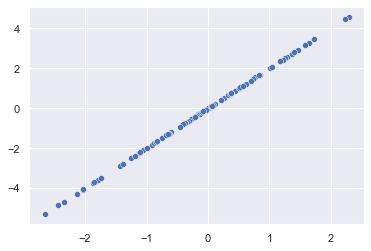

In [42]:
np.random.seed(2)
x = np.random.normal(size=100)
y = x*2
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

lm1 = smf.ols(formula='y ~ x + 0', data=df).fit()
lm2 = smf.ols(formula='x ~ y + 0', data=df).fit()

print(lm1.params, '\n')
print(lm2.params)

<a id='12c'></a>
**$(c)$ Generate an example in $R$ with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is the same as the coefficient estimate for the regression of $Y$ onto $X$**

x    1.0
dtype: float64
y    1.0
dtype: float64


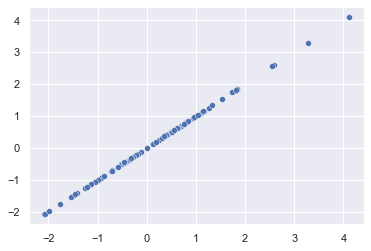

In [43]:
x = np.random.normal(size=100)
y = x
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

model1 = smf.ols(formula='y ~ x + 0', data=df).fit()
model2 = smf.ols(formula='x ~ y + 0', data=df).fit()

print(model1.params)
print(model2.params)

<a id='13'></a>
## $13.$ In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use $\text{set.seed(1)}$ prior to starting part $(a)$ to ensure consistent results.

<a id='13a'></a>
**$(a)$ Using the $rnorm()$ function, create a vector, $x$, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, $X$.**

In [44]:
# the equivalence of rnorm() function in R
np.random.seed(1)
x = np.random.normal(0, 1, 100)

<a id='13b'></a>
**$(b)$ Using the $rnorm()$ function, create a vector, $eps$, containing 100 observations drawn from a $N(0,0.25)$ distribution i.e. a normal distribution with mean zero and variance $0.25$.**

In [45]:
eps = np.random.normal(0, 0.25, 100)

<a id='13c'></a>
**$(c)$ Using $x$ and $eps$, generate a vector y according to the model**

$$Y =−1+0.5X+\epsilon.$$

**What is the length of the vector $y$? What are the values of $\beta_0$ and $\beta_1$ in this linear model?**

In [46]:
y = -1 + 0.5*x + eps
print("the length of the vector 𝑦 is:", len(y), "observations ")

the length of the vector 𝑦 is: 100 observations 


$\beta_0 = -1$

$\beta_1 = 0.5$

<a id='13d'></a>
**$(d)$ Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.**

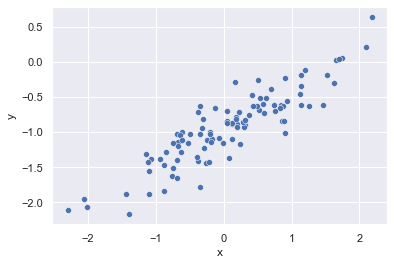

In [47]:
sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y');

>- Positive linear relationship
>- Intercept $\approx -1$, and slope $\approx 0.5$ as expected.

<a id='13e'></a>
**$(e)$ Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\beta_0$ and $\beta_1$ compare to $\beta_0$ and $\beta_1$?**

In [48]:
# Model
df = pd.DataFrame({'x':x, 'y':y})
lm0 = smf.ols('y ~ x', df).fit()

# Using the summary() func
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           5.39e-36
Time:                        21:16:44   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>- $\beta_0 = -1$,    $\hat{\beta_0} = -0.9632$ 

>- $\beta_1 = 0.5$,    $\hat{\beta_1} = 0.5239$

>- The model estimates the intercept and the slop pretty close to the true values.

<a id='13f'></a>
**$(f)$ Display the least squares line on the scatterplot obtained in $(d)$. Draw the population regression line on the plot, in a different color. Use the $legend()$ command to create an appropriate legend.**

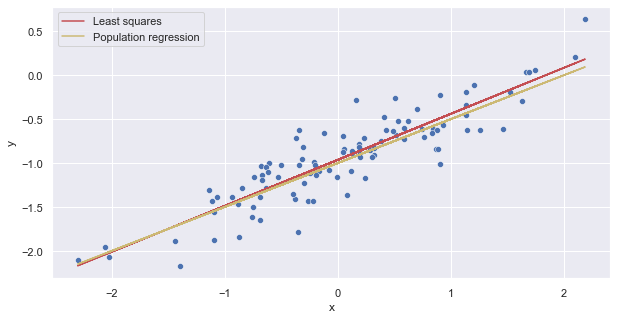

In [49]:
y_pred = lm0.predict()
y_act  = -1+(0.5*df.x)

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='x', y='y', data=df)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(df.x, y_pred, color='r')
ax.plot(df.x, y_act, color='y')

ax.legend(['Least squares', 'Population regression']);

<a id='13g'></a>
**$(g)$ Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

In [50]:
# Model
lm = smf.ols('y ~ x + np.square(x)', df).fit()

# Using the summary() func
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.32e-34
Time:                        21:16:44   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x                0.5234      0.027     19.582      0.000       0.470       0.576
np.square(x)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>- The $\text{p-value}$ determine that $x^2$ is not a statistical significant relationship with $y$. 
>- in this case we can't reject the null hypothesis that $H_0 : \beta_2 = 0$
>- Hence, the quadratic term doesn't improve the model fit.

<a id='13h'></a>
**$(h)$ Repeat $(a)–(f)$ after modifying the data generation process in such a way that there is less noise in the data. The model $(3.39)$ should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in $(b)$. Describe your results.**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2834.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.92e-74
Time:                        21:16:44   Log-Likelihood:                 100.98
No. Observations:                 100   AIC:                            -198.0
Df Residuals:                      98   BIC:                            -192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9953      0.009   -110.296      0.000      -1.013      -0.977
x              0.5086      0.010     53.233      0.000       0.490       0.528
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.039
Skew:                          -0.011   Prob(JB):                        0.981
Kurtosis:                       2.906   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

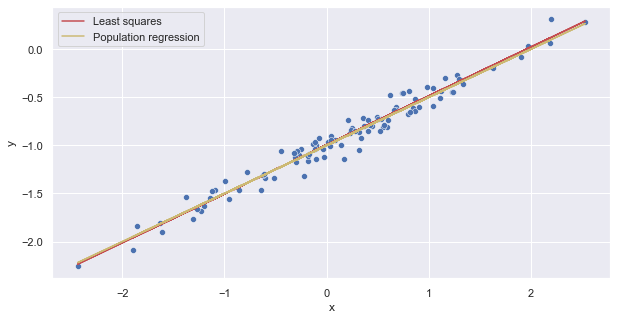

In [51]:
# generate x, y and epsilon
np.random.seed(1)

eps = np.random.normal(0, 0.1, 100)
x = np.random.normal(0, 1, 100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'x':x, 'y':y})

# Model
lm1 = smf.ols('y ~ x', df).fit()

# the graph
y_pred = lm1.predict()
y_act  = -1+(0.5*df.x)

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='x', y='y', data=df)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(df.x, y_pred, color='r')
ax.plot(df.x, y_act, color='y')

ax.legend(['Least squares', 'Population regression']);

# Using the summary() func
lm1.summary()

>- With less noise in the data, the model now has a significant high $R^2$ of $0.959$! and this is because our data is more likely to be linear with the reduction of the $\epsilon$.
>- The $\text{p-value}$ still determine that $x$ is a statistical significant relationship with $y$.
>- Now the intercept and the slop are much close to the true population values!

<a id='13i'></a>
**$(i)$ Repeat $(a)–(f)$ after modifying the data generation process in such a way that there is more noise in the data. The model $(3.39)$ should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in $(b)$. Describe your results.**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.35e-19
Time:                        21:16:45   Log-Likelihood:                -59.968
No. Observations:                 100   AIC:                             123.9
Df Residuals:                      98   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9763      0.045    -21.639      0.000      -1.066      -0.887
x              0.5430      0.048     11.367      0.000       0.448       0.638
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.039
Skew:                          -0.011   Prob(JB):                        0.981
Kurtosis:                       2.906   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

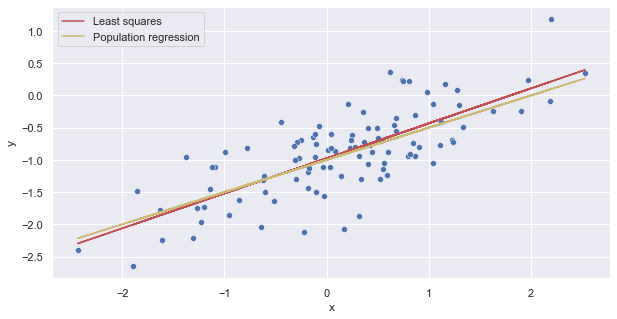

In [52]:
# generate x, y and epsilon
np.random.seed(1)

eps = np.random.normal(0, 0.5, 100)
x = np.random.normal(0, 1, 100)
y = -1 + 0.5*x + eps
df = pd.DataFrame({'x':x, 'y':y})

# Model
lm2 = smf.ols('y ~ x', df).fit()

# the graph
y_pred = lm2.predict()
y_act  = -1+(0.5*df.x)

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='x', y='y', data=df)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(df.x, y_pred, color='r')
ax.plot(df.x, y_act, color='y')

ax.legend(['Least squares', 'Population regression']);

# Using the summary() func
lm2.summary()

>- With more noise in the data, the model now has a decreased $R^2$ of $0.569$!
>- The $\text{p-value}$ still determine that $x$ is a statistical significant relationship with $y$.
>- Now the intercept and the slop are slightly away from the true population values!

<a id='13j'></a>
**$(j)$ What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.**

>- **Based on the original data set..**

In [53]:
lm0.conf_int().rename(columns={0:'0.025', 1: '0.975]'})

0.025    0.975]
Intercept -1.009870 -0.916623
x          0.471307  0.576407

>- **Based on the noisier data set..**

In [54]:
lm2.conf_int().rename(columns={0:'[0.025', 1: '0.975]'})

[0.025   0.975]
Intercept -1.065819 -0.88675
x          0.448237  0.63784

>- **Based on the less noisy data set..**

In [55]:
lm1.conf_int().rename(columns={0:'[0.025', 1: '0.975]'})

[0.025    0.975]
Intercept -1.013164 -0.977350
x          0.489647  0.527568

>- All of the confidence intervals seem to have close values to the known population parameters $\beta_0 = -1$ and $\beta_1 = 0.5$.
>- As the noise increases confidence intervals become wider.

<a id='14'></a>
## $14.$ This problem focuses on the $collinearity$ problem.

<a id='14a'></a>
**$(a)$ Perform the following commands in $R$:**
```
> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
```
**The last line corresponds to creating a linear model in which $y$ is a function of $x1$ and $x2$. Write out the form of the linear model. What are the regression coefficients?**

In [56]:
# The equivalence of these commands in python
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.randn(100)/10
y  = 2 + 2*x1 + 0.3*x2 + np.random.randn(100)

>- **The form of the linear model is:**
>- $\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$

>- **The coefficients are:**
>- $\beta_0 = 2$
>- $\beta_1 = 2$
>- $\beta_2 = 0.3$ 

<a id='14b'></a>
**$(b)$ What is the correlation between $x1$ and $x2$? Create a scatterplot displaying the relationship between the variables.**

The correlation between 𝑥1 and 𝑥2 is: 0.8390596222844916


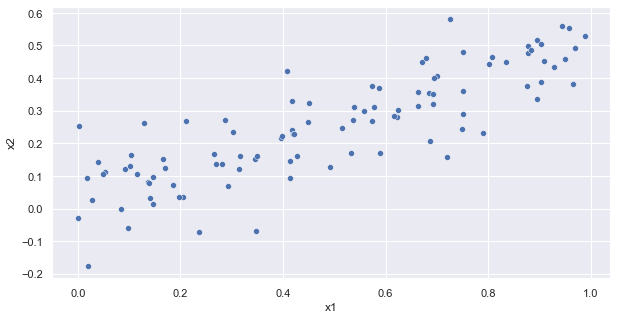

In [57]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
print('The correlation between 𝑥1 and 𝑥2 is:', df.corr().iloc[1,0])

plt.figure(figsize=(10,5))
sns.scatterplot(x='x1', y='x2', data=df);

<a id='14c'></a>
**$(c)$ Using this data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?**

In [58]:
# Model
f = 'y ~ x1 + x2'
lm = smf.ols(formula=f, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           4.40e-07
Time:                        21:16:46   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$?**
 - $\beta_0 = 2.0$ | $\hat{\beta_0} = 2.1893$
 - $\beta_1 = 2.0$ | $\hat{\beta_1} = 0.7046$
 - $\beta_2 = 0.3$ | $\hat{\beta_2} = 2.5024$
 
 
- **Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?**
 - With our $\text{p-value}$ threshold of $0.05$:
   - we **can not reject** the null hypothesis of $\beta_1$ of $x1$.
   - And we **can reject** the null hypothesis of $\beta_2$ of $x2$.

<a id='14d'></a>
**$(d)$ Now fit a least squares regression to predict y using only $x1$. Comment on your results. Can you reject the null hypothesis $H_0 :\beta_1 =0$?**

In [59]:
# Model
f = 'y ~ x1'
lm = smf.ols(formula=f, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           6.68e-07
Time:                        21:16:46   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **What are $\hat{\beta_0}$, and $\hat{\beta_1}$? How do these relate to the true $\beta_0$, and $\beta_1$?**
 - $\beta_0 = 2$ | $\hat{\beta_0} = 2.2486$
 - $\beta_1 = 2$ | $\hat{\beta_1} = 1.8770$
 
 
- **Can you reject the null hypothesis $H_0 :\beta_1 =0$?**
 - With our $\text{p-value}$ threshold of $0.05$:
   - we now **can reject** the null hypothesis of $\beta_1$ of $x1$.
   
   
- Using just $x1$, our model estimates $\beta_1$ more closer to the true value now.

<a id='14e'></a>
**$(e)$ Now fit a least squares regression to predict y using only $x2$. Comment on your results. Can you reject the null hypothesis $H_0 :\beta_1 =0$?**

In [60]:
# Model
f = 'y ~ x2'
lm = smf.ols(formula=f, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.09e-07
Time:                        21:16:46   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **What are $\hat{\beta_0}$, and $\hat{\beta_1}$? How do these relate to the true $\beta_0$, and $\beta_1$?**
 - $\beta_0 = 2.0$ | $\hat{\beta_0} = 2.2655$
 - $\beta_1 = 0.3$ | $\hat{\beta_1} = 3.5613$
 
 
- **Can you reject the null hypothesis $H_0 :\beta_1 =0$?**
 - With our $\text{p-value}$ threshold of $0.05$:
   - we still **can reject** the null hypothesis of $\beta_1$ of $x2$.
   
   
- Using just $x2$, our model over estimates $\beta_1$.

<a id='14f'></a>
**$(f)$ Do the results obtained in $(c)–(e)$ contradict each other? Explain your answer.**

> - Yes, the results in $(c)$ contradict with the results in $(d)$ and lead us to incorrectly accepting the null hypothesis $H_0 :\beta_1 =0$ in $(c)$. 
> - As our predictors $x1$ and $x2$ are highly correlated, we are facing a $collinearity$ problem now.

<a id='14g'></a>
**$(g)$ Now suppose we obtain one additional observation, which was unfortunately mismeasured.**
```
> x1=c(x1, 0.1) 
> x2=c(x2, 0.8)
> y =c(y,6)
```
**Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.**

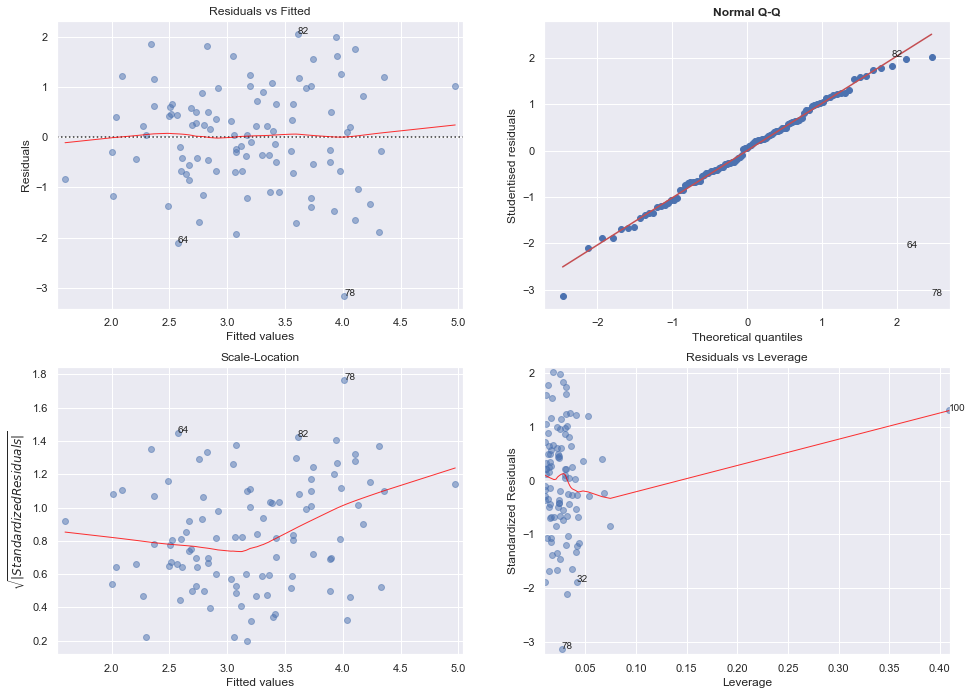

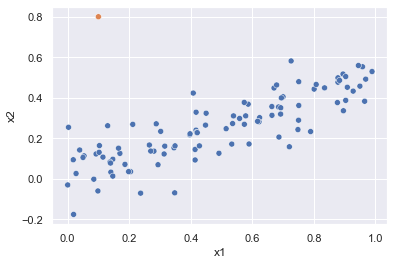

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           5.51e-08
Time:                        21:16:48   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df = df.append({'x1': 0.1, 'x2': 0.8, 'y': 6}, ignore_index=True)

# as we add the observation in the end of the df,
# we can show it as following
hue = np.concatenate((np.zeros(100),np.array([1])))

# Models
lm_c = smf.ols(formula='y ~ x1 + x2', data=df).fit()
lm_d = smf.ols(formula='y ~ x1',      data=df).fit()
lm_e = smf.ols(formula='y ~ x2',      data=df).fit()

diagnostic_plots(lm_c, df[['x1', 'x2']], df.y)
plt.show()

# the observation specified in red color
sns.scatterplot(x='x1', y='x2',hue=hue, data=df, legend=False)
plt.show()

lm_c.summary()

**Model in $(c)$: $$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x1 + \hat{\beta_2} x2$$**

>- From the right-down Residuals vs Leverage plot shows that the new observation in the first model with two predictors, **is a high leverage**.
>- But **we won't consider it as an outlier**, with our threshold of 3, -3.

>- The $\text{p-value}$ for $x2$ is more statistical significant than before, but not for $x1$ and we still can not reject the null hypothesis for $x1$.

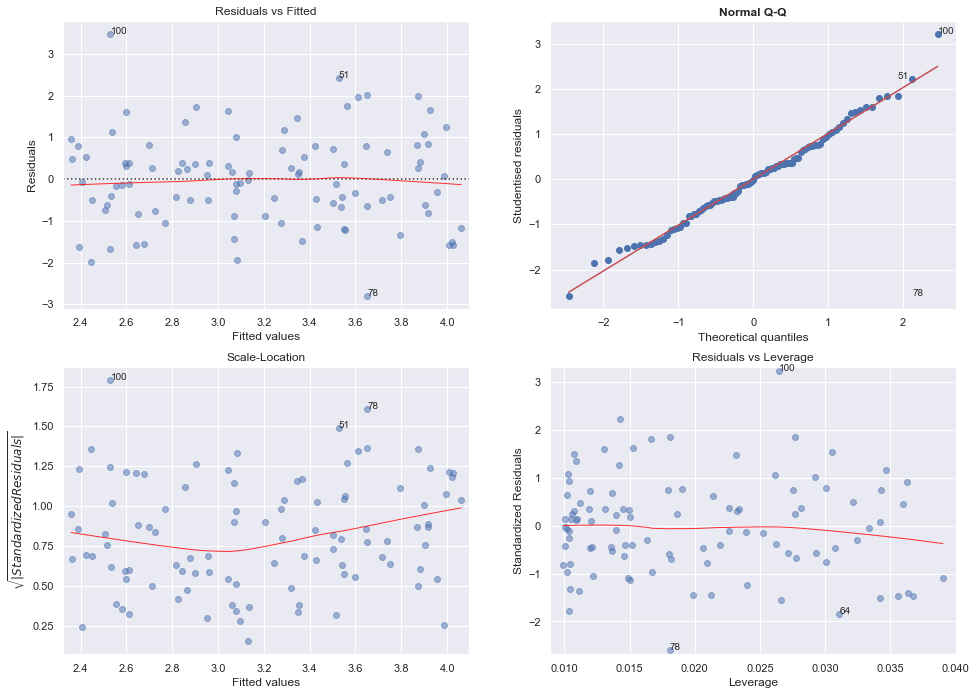

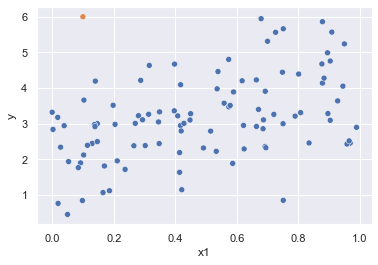

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           9.15e-06
Time:                        21:16:50   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
diagnostic_plots(lm_d, df.x1, df.y)
plt.show()

sns.scatterplot(x='x1', y='y',hue=hue, legend=False, data=df)
plt.show();

lm_d.summary()

**Model in $(d)$: $$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x1$$**

>- From the right-down Residuals vs Leverage plot shows that the new observation in the second model with $x1$ as a predictor, **is not a high leverage**.
>- But **it is an outlier**, with our threshold of 3, -3.

>- The $\text{p-value}$ for $x1$ is a statistical significant, and we can  reject the null hypothesis.

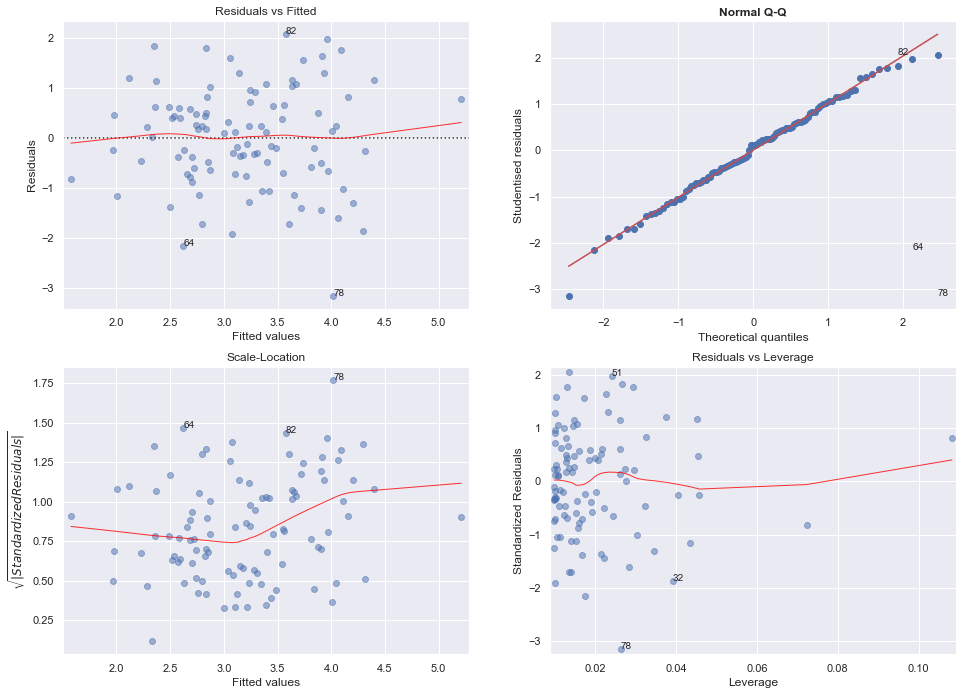

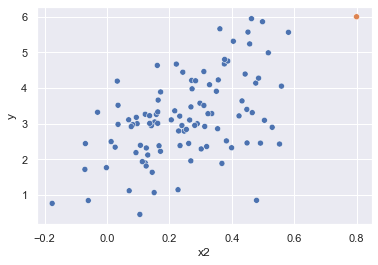

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           7.41e-09
Time:                        21:16:52   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
diagnostic_plots(lm_e, df.x2, df.y)
plt.show()

sns.scatterplot(x='x2', y='y',hue=hue, legend=False, data=df)
plt.show()

lm_e.summary()

**Model in $(e)$: $$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x2$$**

>- From the right-down Residuals vs Leverage plot shows that the new observation in the third model with $x2$ as a predictor, **is a high leverage**.
>- But **we won't consider it as an outlier**, with our threshold of 3, -3.

>- The $\text{p-value}$ for $x2$ still a statistical significant, and we can reject the null hypothesis.

<a id='15'></a>
### $15.$ This problem involves the $Boston$ data set, which we saw in the lab for this chapter. We will now try to predict $\text{per capita crime rate}$ using the other variables in this data set. In other words, $per capita crime rate$ is the response, and the other variables are the predictors.

<a id='15a'></a>
**$(a)$ For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

In [64]:
# read boston dataset 
boston_df = pd.read_csv('datasets/Boston.csv').drop('Unnamed: 0', axis=1)
boston_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [65]:
# building Linear models 
# all models are in the assignment "Models"

Models = [smf.ols(formula='crim ~ {}'.format(i), data=boston_df).fit() 
          for i in boston_df.drop(['crim', 'chas'], axis=1).columns]
Models.append(smf.ols(formula='crim ~ C(chas)', data=boston_df).fit())

In [66]:
for model in Models:
    display(pd.DataFrame({'coef':    np.around(model.params, 4),
                          'std_err': np.around(model.bse, 3),
                          't':       np.around(model.params / model.bse, 3),
                          'P>|t|':   np.around(model.pvalues, 3),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], 3),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], 3)}))
    print("R2 =", np.around(model.rsquared, 3))
    print('---------------------------------------------')

coef  std_err       t  P>|t|  [0.025  0.975]
Intercept  4.4537    0.417  10.675    0.0   3.634   5.273
zn        -0.0739    0.016  -4.594    0.0  -0.106  -0.042

R2 = 0.04
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept -2.0637    0.667 -3.093  0.002  -3.375  -0.753
indus      0.5098    0.051  9.991  0.000   0.410   0.610

R2 = 0.165
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept -13.7199    1.699  -8.073    0.0 -17.059 -10.381
nox        31.2485    2.999  10.419    0.0  25.356  37.141

R2 = 0.177
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept  20.4818    3.364  6.088    0.0  13.872  27.092
rm         -2.6841    0.532 -5.045    0.0  -3.729  -1.639

R2 = 0.048
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept -3.7779    0.944 -4.002    0.0  -5.633  -1.923
age        0.1078    0.013  8.463    0.0   0.083   0.133

R2 = 0.124
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept  9.4993    0.730  13.006    0.0   8.064  10.934
dis       -1.5509    0.168  -9.213    0.0  -1.882  -1.220

R2 = 0.144
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept -2.2872    0.443  -5.157    0.0  -3.158  -1.416
rad        0.6179    0.034  17.998    0.0   0.550   0.685

R2 = 0.391
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept -8.5284    0.816 -10.454    0.0 -10.131  -6.926
tax        0.0297    0.002  16.099    0.0   0.026   0.033

R2 = 0.34
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept -17.6469    3.147 -5.607    0.0 -23.830 -11.464
ptratio     1.1520    0.169  6.801    0.0   0.819   1.485

R2 = 0.084
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept  16.5535    1.426  11.609    0.0  13.752  19.355
black      -0.0363    0.004  -9.367    0.0  -0.044  -0.029

R2 = 0.148
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept -3.3305    0.694  -4.801    0.0  -4.694  -1.968
lstat      0.5488    0.048  11.491    0.0   0.455   0.643

R2 = 0.208
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept  11.7965    0.934  12.628    0.0   9.961  13.632
medv       -0.3632    0.038  -9.460    0.0  -0.439  -0.288

R2 = 0.151
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept     3.7444    0.396  9.453  0.000   2.966   4.523
C(chas)[T.1] -1.8928    1.506 -1.257  0.209  -4.852   1.066

R2 = 0.003
---------------------------------------------


>- $\text{p-value} < 0.05$

In [67]:
# with statistically significant
for model in Models:
    if model.pvalues[1] < 0.05:
        print(model.pvalues[1:].index[0], '=', round(model.pvalues[1], 3))

zn = 0.0
indus = 0.0
nox = 0.0
rm = 0.0
age = 0.0
dis = 0.0
rad = 0.0
tax = 0.0
ptratio = 0.0
black = 0.0
lstat = 0.0
medv = 0.0


>- $\text{p-value} > 0.05$

In [68]:
# without statistically significant 
for model in Models:
    if model.pvalues[1] > 0.05:
        print(model.pvalues[1:].index[0], '=', round(model.pvalues[1], 3))

C(chas)[T.1] = 0.209


>- It appears that our predictors are all statistically significant except the dummy predictor $chas$.

<a id='15b'></a>
**$(b)$ Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?**

In [69]:
quan = boston_df.columns.drop(['chas', 'crim'])
f = 'crim ~ {}'.format('+'.join(quan)+'+C(chas)')

# Model
lm_b = smf.ols(formula=f, data=boston_df).fit()
display(lm_b.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.57e-56
Time:                        21:16:52   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.0332      7.235      2.354      0.019       2.818      31.248
C(chas)[T.1]    -0.7491      1.180     -0.635      0.526      -3.068       1.570
zn               0.0449      0.019      2.394      0.017       0.008       0.082
indus           -0.0639      0.083     -0.766      0.444      -0.228       0.100
nox            -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm               0.4301      0.613      0.702      0.483      -0.774       1.634
age              0.0015      0.018      0.081      0.935      -0.034       0.037
dis             -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad              0.5882      0.088      6.680      0.000       0.415       0.761
tax             -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio         -0.2711      0.186     -1.454      0.147      -0.637       0.095
black           -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat            0.1262      0.076      1.667      0.096      -0.023       0.275
medv            -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>- $\text{p-value} < 0.05$

In [70]:
round(lm_b.pvalues[lm_b.pvalues < 0.05], 4).sort_values()

rad          0.0000
dis          0.0005
medv         0.0011
zn           0.0170
Intercept    0.0189
black        0.0407
dtype: float64

>- $\text{p-value} > 0.05$

In [71]:
round(lm_b.pvalues[lm_b.pvalues > 0.05], 4).sort_values()

nox             0.0512
lstat           0.0962
ptratio         0.1466
indus           0.4443
tax             0.4638
rm              0.4831
C(chas)[T.1]    0.5259
age             0.9355
dtype: float64

>- As we can see, just the predictors $\text{zn, dis, rad, black, and medv}$ are still statistical significant even with increasing in the $\text{p-value}$ than as individual predictors
>- $\text{indus, nox, rm, age, tax, ptratio, and lstat}$ are not statistical significant now and we can not reject their null hypothesis $H_0 : \beta_i = 0$.
>- $chas$ still not statistical significant.

<a id='15c'></a>
**$(c)$ How do your results from $(a)$ compare to your results from $(b)$? Create a plot displaying the univariate regression coefficients from $(a)$ on the x-axis, and the multiple regression coefficients from $(b)$ on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

Univariate_coef  Multivariate_coef
C(chas)[T.1]        -1.892777          -0.749134
age                  0.107786           0.001452
black               -0.036280          -0.007538
dis                 -1.550902          -0.987176
indus                0.509776          -0.063855
lstat                0.548805           0.126211
medv                -0.363160          -0.198887
nox                 31.248531         -10.313535
ptratio              1.151983          -0.271081
rad                  0.617911           0.588209
rm                  -2.684051           0.430131
tax                  0.029742          -0.003780
zn                  -0.073935           0.044855

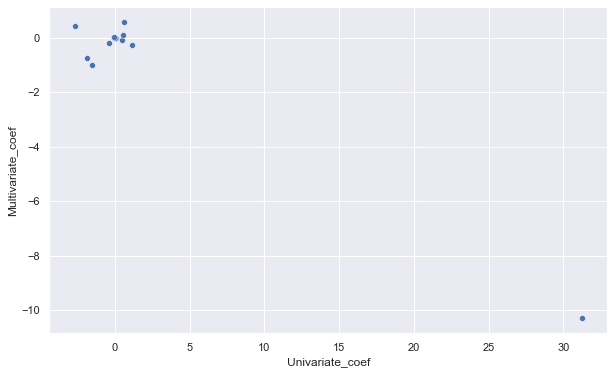

In [72]:
# Get univariate and multiple coefficients
univ_coef = pd.concat([m.params[1:] for m in Models])
mult_coef = lm_b.params[1:]

df = pd.DataFrame({'Univariate_coef': univ_coef, 
                   'Multivariate_coef': mult_coef,})

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Univariate_coef', y='Multivariate_coef', data=df);

df

<a id='15d'></a>
**$(d)$ Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form**

$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$$

In [73]:
# building Linear models 
# all models are in the assignment "Models"

Models = [smf.ols(formula='crim ~ {0} + np.power({0}, 2) + np.power({0}, 3)'.format(i), data=boston_df).fit() 
          for i in boston_df.drop(['crim', 'chas'], axis=1).columns]

for model in Models:
    display(pd.DataFrame({'coef':    np.around(model.params, 4),
                          'std_err': np.around(model.bse, 3),
                          't':       np.around(model.params / model.bse, 3),
                          'P>|t|':   np.around(model.pvalues, 3),
                          '[0.025':  np.around(model.conf_int(alpha=0.05)[0], 3),
                          '0.975]':  np.around(model.conf_int(alpha=0.05)[1], 3)}))
    print("R2 =", np.around(model.rsquared, 3))
    print('---------------------------------------------')

coef  std_err       t  P>|t|  [0.025  0.975]
Intercept        4.8461    0.433  11.192  0.000   3.995   5.697
zn              -0.3322    0.110  -3.025  0.003  -0.548  -0.116
np.power(zn, 2)  0.0065    0.004   1.679  0.094  -0.001   0.014
np.power(zn, 3) -0.0000    0.000  -1.203  0.230  -0.000   0.000

R2 = 0.058
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept           3.6626    1.574  2.327   0.02   0.570   6.755
indus              -1.9652    0.482 -4.077   0.00  -2.912  -1.018
np.power(indus, 2)  0.2519    0.039  6.407   0.00   0.175   0.329
np.power(indus, 3) -0.0070    0.001 -7.292   0.00  -0.009  -0.005

R2 = 0.26
---------------------------------------------


coef  std_err      t  P>|t|    [0.025    0.975]
Intercept          233.0866   33.643  6.928    0.0   166.988   299.185
nox              -1279.3713  170.397 -7.508    0.0 -1614.151  -944.591
np.power(nox, 2)  2248.5441  279.899  8.033    0.0  1698.626  2798.462
np.power(nox, 3) -1245.7029  149.282 -8.345    0.0 -1538.997  -952.409

R2 = 0.297
---------------------------------------------


coef  std_err      t  P>|t|   [0.025   0.975]
Intercept        112.6246   64.517  1.746  0.081  -14.132  239.382
rm               -39.1501   31.311 -1.250  0.212 -100.668   22.368
np.power(rm, 2)    4.5509    5.010  0.908  0.364   -5.292   14.394
np.power(rm, 3)   -0.1745    0.264 -0.662  0.509   -0.693    0.344

R2 = 0.068
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept        -2.5488    2.769 -0.920  0.358  -7.989   2.892
age               0.2737    0.186  1.468  0.143  -0.093   0.640
np.power(age, 2) -0.0072    0.004 -1.988  0.047  -0.014  -0.000
np.power(age, 3)  0.0001    0.000  2.724  0.007   0.000   0.000

R2 = 0.174
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept         30.0476    2.446  12.285    0.0  25.242  34.853
dis              -15.5544    1.736  -8.960    0.0 -18.965 -12.144
np.power(dis, 2)   2.4521    0.346   7.078    0.0   1.771   3.133
np.power(dis, 3)  -0.1186    0.020  -5.814    0.0  -0.159  -0.079

R2 = 0.278
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept        -0.6055    2.050 -0.295  0.768  -4.633   3.422
rad               0.5127    1.044  0.491  0.623  -1.538   2.563
np.power(rad, 2) -0.0752    0.149 -0.506  0.613  -0.367   0.217
np.power(rad, 3)  0.0032    0.005  0.703  0.482  -0.006   0.012

R2 = 0.4
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept         19.1836   11.796  1.626  0.105  -3.991  42.358
tax               -0.1533    0.096 -1.602  0.110  -0.341   0.035
np.power(tax, 2)   0.0004    0.000  1.488  0.137  -0.000   0.001
np.power(tax, 3)  -0.0000    0.000 -1.167  0.244  -0.000   0.000

R2 = 0.369
---------------------------------------------


coef  std_err      t  P>|t|   [0.025   0.975]
Intercept             477.1840  156.795  3.043  0.002  169.129  785.239
ptratio               -82.3605   27.644 -2.979  0.003 -136.673  -28.048
np.power(ptratio, 2)    4.6353    1.608  2.882  0.004    1.475    7.795
np.power(ptratio, 3)   -0.0848    0.031 -2.743  0.006   -0.145   -0.024

R2 = 0.114
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept           18.2637    2.305  7.924  0.000  13.735  22.792
black               -0.0836    0.056 -1.483  0.139  -0.194   0.027
np.power(black, 2)   0.0002    0.000  0.716  0.474  -0.000   0.001
np.power(black, 3)  -0.0000    0.000 -0.608  0.544  -0.000   0.000

R2 = 0.15
---------------------------------------------


coef  std_err      t  P>|t|  [0.025  0.975]
Intercept           1.2010    2.029  0.592  0.554  -2.785   5.187
lstat              -0.4491    0.465 -0.966  0.335  -1.362   0.464
np.power(lstat, 2)  0.0558    0.030  1.852  0.065  -0.003   0.115
np.power(lstat, 3) -0.0009    0.001 -1.517  0.130  -0.002   0.000

R2 = 0.218
---------------------------------------------


coef  std_err       t  P>|t|  [0.025  0.975]
Intercept          53.1655    3.356  15.840    0.0  46.571  59.760
medv               -5.0948    0.434 -11.744    0.0  -5.947  -4.242
np.power(medv, 2)   0.1555    0.017   9.046    0.0   0.122   0.189
np.power(medv, 3)  -0.0015    0.000  -7.312    0.0  -0.002  -0.001

R2 = 0.42
---------------------------------------------


In [74]:
# with statistically significant
ss = pd.Series(dtype=object)
for model in Models:
    ss = pd.concat((ss, model.pvalues[model.pvalues < 0.05]))
ss = ss[ss.index != 'Intercept']

>- predictors with $\text{p-value} < 0.05$

In [75]:
round(ss, 4).sort_values()

np.power(medv, 3)       0.0000
np.power(indus, 2)      0.0000
np.power(indus, 3)      0.0000
nox                     0.0000
np.power(nox, 2)        0.0000
np.power(nox, 3)        0.0000
medv                    0.0000
np.power(medv, 2)       0.0000
dis                     0.0000
np.power(dis, 2)        0.0000
np.power(dis, 3)        0.0000
indus                   0.0001
zn                      0.0026
ptratio                 0.0030
np.power(ptratio, 2)    0.0041
np.power(ptratio, 3)    0.0063
np.power(age, 3)        0.0067
np.power(age, 2)        0.0474
dtype: float64

>- As shown, there are some predictors where cubic and quadratic are statistical significant, which as $\text{medv, indus, nox, dis, ptratio, and age}$
>- Which provides evidence of non-linear association between those predictors and the response.